In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('temperature_data.csv')

In [31]:
df.head(7)

,city,timestamp,temperature,season
0,New York,2010-01-01,-5.708643,winter
1,New York,2010-01-02,9.719531,winter
2,New York,2010-01-03,-5.446145,winter
3,New York,2010-01-04,-0.787049,winter
4,New York,2010-01-05,-2.969704,winter
5,New York,2010-01-06,3.223192,winter
6,New York,2010-01-07,-1.710828,winter


In [165]:
'''
import pandas as pd
df = pd.DataFrame(df)
min_temp_index = df['temperature'].idxmin()
min_city = df.loc[min_temp_index, 'city']
min_temperature = df.loc[min_temp_index, 'temperature']
print(f"Город с минимальной температурой: {min_city}, Минимальная температура: {min_temperature:.2f}°C")
print(f"City with a minimum temperature: {min_city}, minimum temperature: {min_temperature:.2f}°C")
print(f" minimum temperature: {min_temperature:.2f}°C")
'''

Город с минимальной температурой: Moscow, Минимальная температура: -24.68°C
City with a minimum temperature: Moscow, minimum temperature: -24.68°C
 minimum temperature: -24.68°C


In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54750 entries, 0 to 54749
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         54750 non-null  object 
 1   timestamp    54750 non-null  object 
 2   temperature  54750 non-null  float64
 3   season       54750 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


,temperature
count,54750.000000
mean,18.309224
std,11.014321
min,-24.677574
25%,11.235982
50%,18.833330
75%,26.108847
max,58.228766


In [33]:
df.shape
number_rows = df.shape[0]
number_columns = df.shape[1]
print('Количество строк:', number_rows)
print('Количество столбцов:', number_columns)

Количество строк: 54750
Количество столбцов: 4


In [34]:
df.isnull().sum()

,0
city,0
timestamp,0
temperature,0
season,0


In [35]:
total = df.isnull().sum().sum()
print("Общее количество пропусков:", total)

column = df.isnull().sum()
m_columns = column[column > 0]
print(m_columns)

Общее количество пропусков: 0
Series([], dtype: int64)


# 1. Анализ данных


Анализ исторических данных:

Вычислить скользящее среднее температуры с окном в 30 дней для сглаживания краткосрочных колебаний.
Рассчитать среднюю температуру и стандартное отклонение для каждого сезона в каждом городе.
Выявить аномалии, где температура выходит за пределы  среднее±2σ .
Попробуйте распараллелить проведение этого анализа. Сравните скорость выполнения анализа с распараллеливанием и без него.

## Проанализируем среднюю температуру за период месяц и год

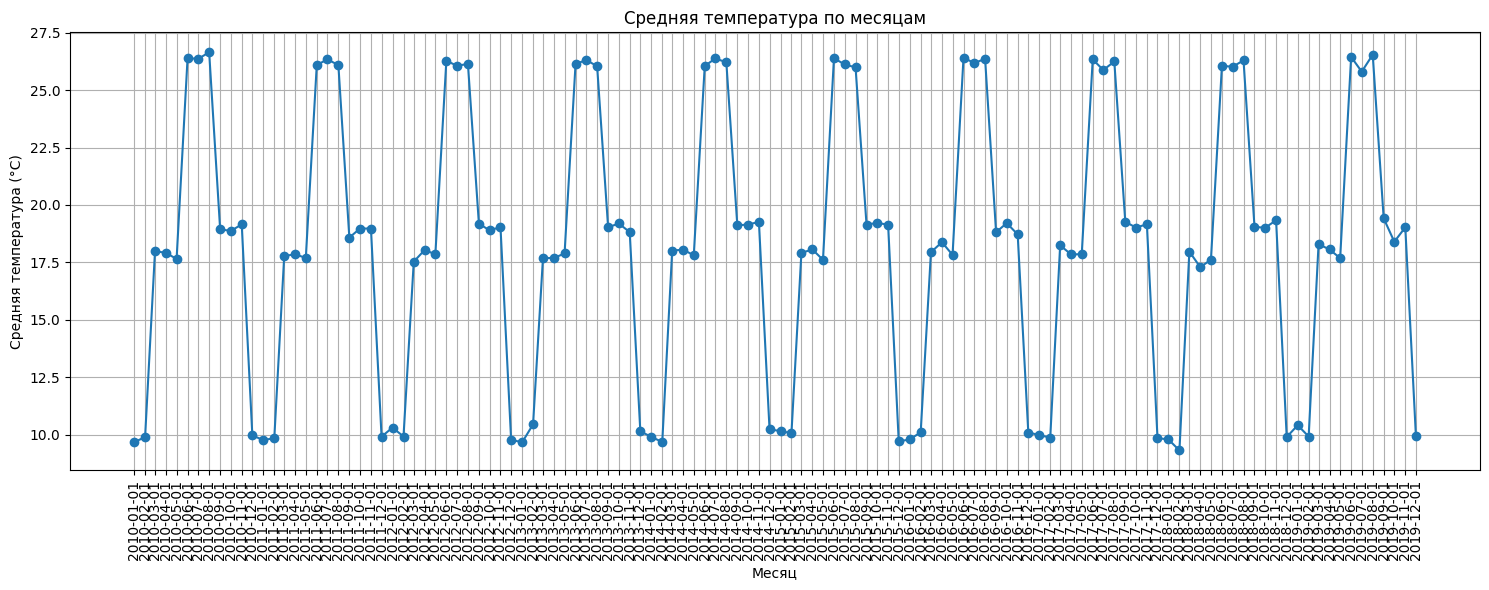

In [36]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year_month'] = df['timestamp'].dt.to_period('M')  # Создание нового столбца 'year_month', который содержит год и месяц
monthly_mean = df.groupby('year_month')['temperature'].mean().reset_index() # Группировка данных по 'year_month' и вычисление средней температуры

monthly_mean['year_month'] = monthly_mean['year_month'].dt.to_timestamp() # Преобразование 'year_month'  для построения графика

# Визуализация данных
plt.figure(figsize=(15, 6))
plt.plot(monthly_mean['year_month'], monthly_mean['temperature'], marker='o')
plt.title('Средняя температура по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°C)')
plt.grid()
plt.xticks(monthly_mean['year_month'], rotation=90)  # Поворот меток на оси X для лучшей читаемости
plt.tight_layout()  # Для улучшения компоновки графика
plt.show()

In [37]:
print(f"Средняя температура: {monthly_mean}")

Средняя температура:     year_month  temperature
0   2010-01-01     9.677818
1   2010-02-01     9.897615
2   2010-03-01    17.992122
3   2010-04-01    17.914348
4   2010-05-01    17.650682
..         ...          ...
115 2019-08-01    26.541098
116 2019-09-01    19.416795
117 2019-10-01    18.399622
118 2019-11-01    19.027813
119 2019-12-01     9.943783

[120 rows x 2 columns]


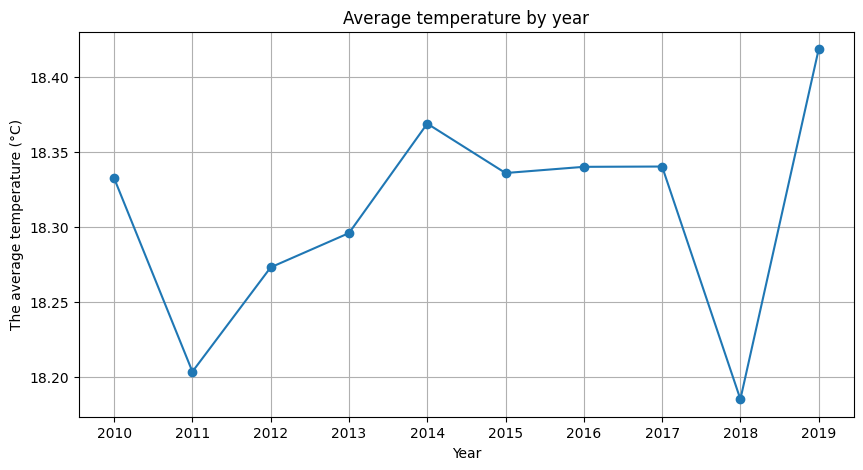

In [38]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year # Создание нового столбца 'year', который содержит год
annual_mean = df.groupby('year')['temperature'].mean().reset_index()
# Визуализация данных
plt.figure(figsize=(10, 5))
plt.plot(annual_mean['year'], annual_mean['temperature'], marker='o')
plt.title('Average temperature by year')
plt.xlabel('Year')
plt.ylabel('The average temperature (°C)')
plt.grid()
plt.xticks(annual_mean['year'])
plt.show()

## Расчитаем средние температуры и стандартные отклонения для каждого гороода и сезона.

In [39]:
mean_and_std = df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()

In [40]:
mean_and_std.head(10)

,city,season,mean,std
0,Beijing,autumn,15.887874,4.994010
1,Beijing,spring,12.972876,5.023080
2,Beijing,summer,26.919439,4.802112
3,Beijing,winter,-1.931907,5.080286
4,Berlin,autumn,11.017517,4.964859
5,Berlin,spring,10.229643,4.972362
6,Berlin,summer,20.305067,4.940060
7,Berlin,winter,0.065802,4.805235
8,Cairo,autumn,25.152550,4.917857
9,Cairo,spring,24.949841,5.024832


In [41]:
mean_and_std.shape
number_rows = mean_and_std.shape[0]
number_columns = mean_and_std.shape[1]
print('Количество строк:', number_rows)
print('Количество столбцов:', number_columns)

Количество строк: 60
Количество столбцов: 4


In [42]:
number_rows = mean_and_std.shape[0]
print('Количество строк:', number_rows)

Количество строк: 60


Посчитаем отклонения 2 сигмы (где температура выходит за пределы  среднее±2σ) от средней температуры по сезону.

In [43]:
df = df.merge(mean_and_std, on=['city', 'season'])

In [44]:
df.shape

(54750, 8)

Попробуйте распараллелить проведение этого анализа. Сравните скорость выполнения анализа с распараллеливанием и без него.

## Распараллелим анализ и измерим скорость   выполнения анализа с распараллеливанием и без него.




In [45]:
import joblib

In [46]:
%%time

df['anomalies_2sigma'] = (df['temperature'] > (df['mean'] + 2 * df['std'])) | \
                (df['temperature'] < (df['mean'] - 2 * df['std']))
# Отклонение от средней ['mean'] тепературы за сезон на 2 сигмы (2 * df['std'])

CPU times: user 4.59 ms, sys: 0 ns, total: 4.59 ms
Wall time: 7.06 ms


## Распараллеливание расчетов

In [47]:
%%time

from joblib import Parallel, delayed

avg_upper_2sigma = df['mean'] + 2 * df['std']
avg_lower_2sigma = df['mean'] - 2 * df['std']
def calcul_anomalies_2sigma(temp, upper_bound, lower_bound):
    return (temp > upper_bound) | (temp < lower_bound)
df['parallel_anomalies_2sigma'] = Parallel(n_jobs=-1)(
    delayed(calcul_anomalies_2sigma)(temp, avg_upper_2sigma.iloc[0], avg_lower_2sigma.iloc[0]) for temp in df['temperature']
)

CPU times: user 1.51 s, sys: 66.8 ms, total: 1.58 s
Wall time: 2.11 s


In [48]:
import time
start_time = time.time()
df['anomalies_2sigma'] = (df['temperature'] > (df['mean'] + 2 * df['std'])) | \
                          (df['temperature'] < (df['mean'] - 2 * df['std']))
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

Время выполнения: 0.0040471553802490234 секунд


In [49]:
import time
start_time = time.time()
df['parallel_anomalies_2sigma'] = Parallel(n_jobs=-1)(
    delayed(calcul_anomalies_2sigma)(temp, avg_upper_2sigma.iloc[0], avg_lower_2sigma.iloc[0]) for temp in df['temperature']
)
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

Время выполнения: 2.313694477081299 секунд


Расчет сделал разными способами и получились одинаковые результаты по скорости. Параллельное вычисление дает в данном случае худший результат по скорости.
### Возможно это связано:
- с дополнительными ресурсами и для создания и управения потоками при параллельном вычислении.
- задача не большая и быстрее выполняется без запаралеллевания.
- проблема в даннаный момент времени в googl colab.

In [50]:
anomalies_2s = df[df['anomalies_2sigma'] == True]
anomalies_2s.head()

,city,timestamp,temperature,season,year_month,year,mean,std,anomalies_2sigma,parallel_anomalies_2sigma
14,New York,2010-01-15,-17.375875,winter,2010-01,2010,-0.054833,5.135903,True,True
31,New York,2010-02-01,-15.380372,winter,2010-02,2010,-0.054833,5.135903,True,True
65,New York,2010-03-07,20.431652,spring,2010-03,2010,9.995782,5.107322,True,True
127,New York,2010-05-08,-0.831938,spring,2010-05,2010,9.995782,5.107322,True,False
152,New York,2010-06-02,38.552919,summer,2010-06,2010,24.929997,4.866523,True,True


In [51]:

anomalies_2s.shape

(2462, 10)

2462 наблюдений отличаются от годовой температуры более чем на 2 стандартных отклонения.

## Посмотри вычисление выбросов боле 3 сигм.

In [52]:
%%time

df['anomalies_3sigma'] = (df['temperature'] > (df['mean'] + 3 * df['std'])) | \
                (df['temperature'] < (df['mean'] - 3 * df['std']))
# Отклонение от средней ['mean'] тепературы за сезон на 3 сигмы (3 * df['std'])

CPU times: user 2.47 ms, sys: 985 µs, total: 3.45 ms
Wall time: 3.5 ms


In [53]:
import time
start_time = time.time()
df['anomalies_3sigma'] = (df['temperature'] > (df['mean'] + 3 * df['std'])) | \
                (df['temperature'] < (df['mean'] - 3 * df['std']))
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

Время выполнения: 0.004293918609619141 секунд


In [54]:
%%time

from joblib import Parallel, delayed
avg_upper_3sigma = df['mean'] + 3 * df['std']
avg_lower_3sigma = df['mean'] - 3 * df['std']
def calcul_anomalies_3sigma(temp, upper_bound, lower_bound):
    return (temp > upper_bound) | (temp < lower_bound)
df['parallel_anomalies_3sigma'] = Parallel(n_jobs=-1)(
    delayed(calcul_anomalies_3sigma)(temp, avg_upper_3sigma.iloc[0], avg_lower_3sigma.iloc[0]) for temp in df['temperature']
)

CPU times: user 2.05 s, sys: 0 ns, total: 2.05 s
Wall time: 2.3 s


In [55]:
import time
start_time = time.time()
df['parallel_anomalies_3sigma'] = Parallel(n_jobs=-1)(
    delayed(calcul_anomalies_3sigma)(temp, avg_upper_3sigma.iloc[0], avg_lower_3sigma.iloc[0]) for temp in df['temperature']
)
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

Время выполнения: 1.4542820453643799 секунд


Такая же ситуация. Параллельный расчет дает худший результат.


In [56]:
anomalies_3s = df[df['anomalies_3sigma'] == True]
anomalies_3s.head()

,city,timestamp,temperature,season,year_month,year,mean,std,anomalies_2sigma,parallel_anomalies_2sigma,anomalies_3sigma,parallel_anomalies_3sigma
14,New York,2010-01-15,-17.375875,winter,2010-01,2010,-0.054833,5.135903,True,True,True,True
429,New York,2011-03-06,-9.353832,spring,2011-03,2011,9.995782,5.107322,True,False,True,False
609,New York,2011-09-02,0.178981,autumn,2011-09,2011,15.247775,4.920612,True,False,True,False
626,New York,2011-09-19,33.217546,autumn,2011-09,2011,15.247775,4.920612,True,True,True,True
1109,New York,2013-01-14,19.136698,winter,2013-01,2013,-0.054833,5.135903,True,True,True,True


In [57]:
anomalies_3s.shape

(151, 12)

151 наблюдение отличается от годовой температуры более чем на 3 стандартных отклонения.

## Наибольшие и наименьшие значения температуры

In [58]:
temp_anomalies_3s = anomalies_3s.sort_values(by='temperature', ascending=False)

In [59]:
temp_anomalies_3s.head(10)

,city,timestamp,temperature,season,year_month,year,mean,std,anomalies_2sigma,parallel_anomalies_2sigma,anomalies_3sigma,parallel_anomalies_3sigma
36378,Dubai,2019-08-30,58.228766,summer,2019-08,2019,39.978481,5.075439,True,True,True,True
45126,Mumbai,2013-08-19,53.946290,summer,2013-08,2013,35.173616,5.019947,True,True,True,True
49806,Cairo,2016-06-14,53.726259,summer,2016-06,2016,35.079977,4.877007,True,True,True,True
47263,Mumbai,2019-06-26,51.931987,summer,2019-06,2019,35.173616,5.019947,True,True,True,True
50948,Cairo,2019-07-31,51.202380,summer,2019-07,2019,35.079977,4.877007,True,True,True,True
44039,Mumbai,2010-08-28,51.133058,summer,2010-08,2010,35.173616,5.019947,True,True,True,True
32974,Dubai,2010-05-05,48.573560,spring,2010-05,2010,29.853539,5.017651,True,True,True,True
35716,Dubai,2017-11-06,46.914897,autumn,2017-11,2017,30.232503,4.877730,True,True,True,True
30153,Rio de Janeiro,2012-08-11,46.149408,summer,2012-08,2012,30.017170,5.095241,True,True,True,True
44446,Mumbai,2011-10-09,45.948949,autumn,2011-10,2011,29.628936,4.965633,True,True,True,True


In [60]:
temp_anomalies_3s.tail(10)

,city,timestamp,temperature,season,year_month,year,mean,std,anomalies_2sigma,parallel_anomalies_2sigma,anomalies_3sigma,parallel_anomalies_3sigma
16131,Moscow,2014-03-12,-9.771217,spring,2014-03,2014,5.178063,4.898464,True,False,True,False
12399,Tokyo,2013-12-20,-11.004997,winter,2013-12,2013,5.734676,5.169414,True,True,True,False
5832,London,2015-12-23,-12.134312,winter,2015-12,2015,5.030085,5.079098,True,True,True,False
23784,Berlin,2015-02-28,-14.738231,winter,2015-02,2015,0.065802,4.805235,True,True,True,False
24061,Berlin,2015-12-02,-15.398157,winter,2015-12,2015,0.065802,4.805235,True,True,True,False
25218,Berlin,2019-02-01,-15.709727,winter,2019-02,2019,0.065802,4.805235,True,True,True,True
2606,New York,2017-02-19,-16.253950,winter,2017-02,2017,-0.054833,5.135903,True,True,True,True
14,New York,2010-01-15,-17.375875,winter,2010-01,2010,-0.054833,5.135903,True,True,True,True
27764,Beijing,2016-01-24,-18.045933,winter,2016-01,2016,-1.931907,5.080286,True,True,True,True
29193,Beijing,2019-12-23,-20.031192,winter,2019-12,2019,-1.931907,5.080286,True,True,True,True


In [36]:
'''
import pandas as pd
df = pd.DataFrame(temp_anomalies_3s)
max_temp_index = temp_anomalies_3s['temperature'].idxmax()
max_city = temp_anomalies_3s.loc[max_temp_index, 'city']
max_temperature = temp_anomalies_3s.loc[max_temp_index, 'temperature']
print(f"Город с максимальной температурой: {max_city}, Максимальная температура: {max_temperature:.2f}°C")
'''

'\nimport pandas as pd\ndf = pd.DataFrame(temp_anomalies_3s)\nmax_temp_index = temp_anomalies_3s[\'temperature\'].idxmax()\nmax_city = temp_anomalies_3s.loc[max_temp_index, \'city\']\nmax_temperature = temp_anomalies_3s.loc[max_temp_index, \'temperature\']\nprint(f"Город с максимальной температурой: {max_city}, Максимальная температура: {max_temperature:.2f}°C")\n'

In [35]:
'''
import pandas as pd
df = pd.DataFrame(temp_anomalies_3s)
min_temp_index = temp_anomalies_3s['temperature'].idxmin()
min_city = temp_anomalies_3s.loc[min_temp_index, 'city']
min_temperature = temp_anomalies_3s.loc[min_temp_index, 'temperature']
print(f"Город с минимальной температурой: {min_city}, Минимальная температура: {min_temperature:.2f}°C")
'''

'\nimport pandas as pd\ndf = pd.DataFrame(temp_anomalies_3s)\nmin_temp_index = temp_anomalies_3s[\'temperature\'].idxmin()\nmin_city = temp_anomalies_3s.loc[min_temp_index, \'city\']\nmin_temperature = temp_anomalies_3s.loc[min_temp_index, \'temperature\']\nprint(f"Город с минимальной температурой: {min_city}, Минимальная температура: {min_temperature:.2f}°C")\n'

## Выводы:
###  Высокая температура объясняется:
- географическим положением городов на земном шаре (близость к экватору);
- влияние местного ландшафта: моря, океана, пустынь;
- давлением воздуха, наличием осадков, облачности и других явлений;
- изменением климата.
### Низкая температура объясняется:
- географическим положением городов на земном шаре;
- давлением воздуха, наличием осадков, облачности и других явлений.

Возможно данные показывают не корректно или содержат не все значения температуры, так как в открытых источниках имеются данные что в тех же городах например Пекин температура была ниже 2020 году (минус 26%).

ниже расчитаем средню температуру по каждому сезону и посморим на распределение температуры на графике.


In [61]:
mean_and_std[mean_and_std['city'] == 'Beijing']


,city,season,mean,std
0,Beijing,autumn,15.887874,4.994010
1,Beijing,spring,12.972876,5.023080
2,Beijing,summer,26.919439,4.802112
3,Beijing,winter,-1.931907,5.080286


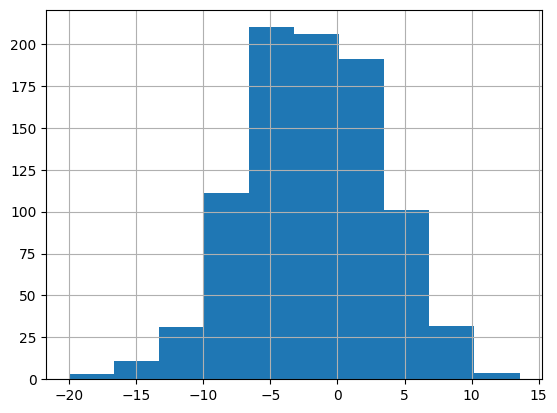

На графике, который был получен в самом начале, наблюдаем больший сдвиг в отрицательные температуры. Возомжно это связано с анаомальной низкой температуры.

График был построен в начале анализа (код написан вначале).

<Axes: >

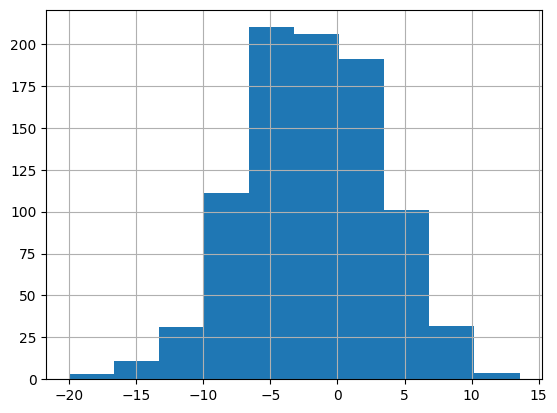

In [62]:
df[(df['city'] == 'Beijing') & (df['season'] == 'winter')]['temperature'].hist()

In [63]:
df.head(8)

,city,timestamp,temperature,season,year_month,year,mean,std,anomalies_2sigma,parallel_anomalies_2sigma,anomalies_3sigma,parallel_anomalies_3sigma
0,New York,2010-01-01,-5.708643,winter,2010-01,2010,-0.054833,5.135903,False,False,False,False
1,New York,2010-01-02,9.719531,winter,2010-01,2010,-0.054833,5.135903,False,False,False,False
2,New York,2010-01-03,-5.446145,winter,2010-01,2010,-0.054833,5.135903,False,False,False,False
3,New York,2010-01-04,-0.787049,winter,2010-01,2010,-0.054833,5.135903,False,False,False,False
4,New York,2010-01-05,-2.969704,winter,2010-01,2010,-0.054833,5.135903,False,False,False,False
5,New York,2010-01-06,3.223192,winter,2010-01,2010,-0.054833,5.135903,False,False,False,False
6,New York,2010-01-07,-1.710828,winter,2010-01,2010,-0.054833,5.135903,False,False,False,False
7,New York,2010-01-08,4.033816,winter,2010-01,2010,-0.054833,5.135903,False,False,False,False


In [64]:
df['MA'] = df['temperature'].rolling(window=50).mean()

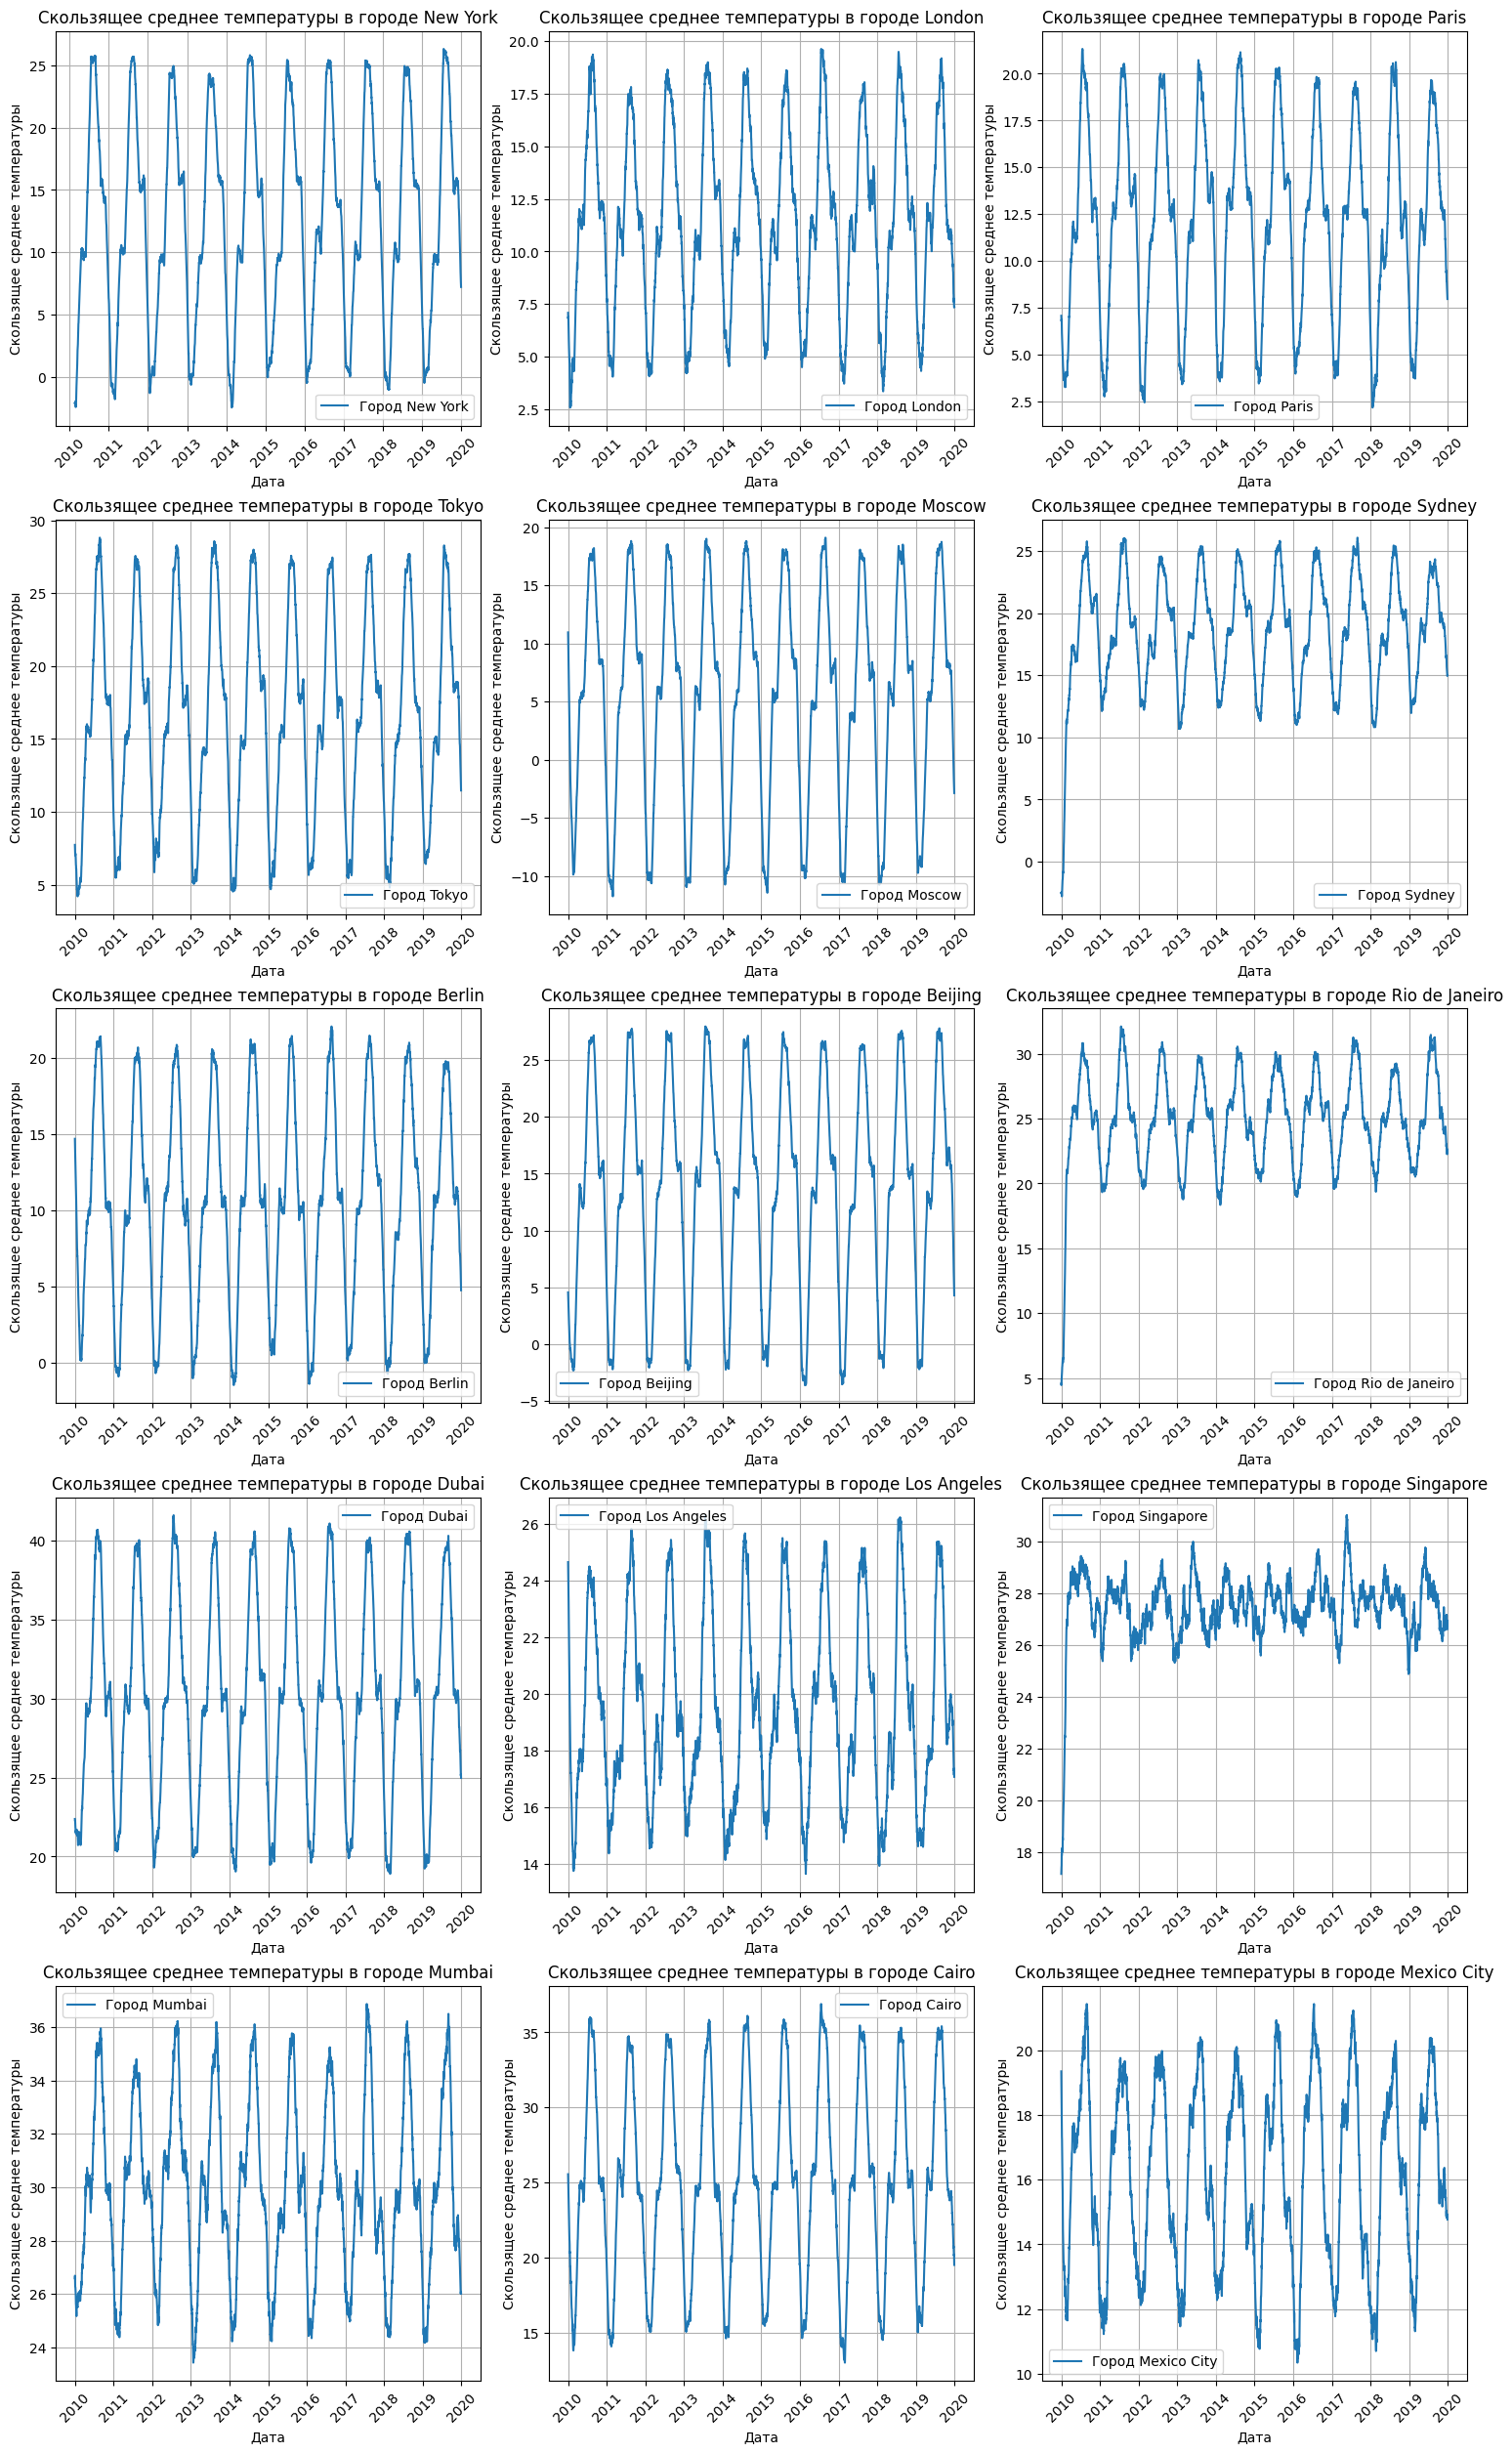

In [65]:
import pandas as pd
df = pd.DataFrame(df)
city_un = df['city'].unique()
num = len(city_un)
cols = 3
rows = (num + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)
axes = axes.flatten()
for i, city in enumerate(city_un):
    city_data = df[df['city'] == city]
    axes[i].plot(city_data['timestamp'], city_data['MA'], label=f'Город {city}')
    axes[i].set_title(f'Скользящее среднее температуры в городе {city}')
    axes[i].set_xlabel('Дата')
    axes[i].set_ylabel('Скользящее среднее температуры')
    axes[i].legend()
    axes[i].grid()
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

На графиках видно, что в городах Сидней, Рио-де-женейро, Сингапур имеются аномальные выбросы температур.

In [66]:
city_del = ['Singapore','Sydney', 'Rio de Janeiro']

In [67]:
%%time
df_city_del_1 = df[~((df['city'].isin(city_del)) & (df['timestamp'] <= '2010-03-30'))]

CPU times: user 15.7 ms, sys: 984 µs, total: 16.7 ms
Wall time: 17.6 ms


In [68]:
import time
start_time = time.time()
df_city_del_1 = df[~((df['city'].isin(city_del)) & (df['timestamp'] <= '2009-03-30'))]
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

Время выполнения: 0.014047384262084961 секунд


In [69]:
%%time
def city_del_city(row):
    return not (row['city'] in city_del and row['timestamp'] <= pd.to_datetime('2010-03-30'))
starw = Parallel(n_jobs=-1)(delayed(city_del_city)(row) for index, row in df.iterrows())

df_city_del_2 = df[starw]

CPU times: user 18.2 s, sys: 69.2 ms, total: 18.3 s
Wall time: 25.2 s


In [70]:
import time
start_time = time.time()
def city_del_city(row):
    return not (row['city'] in city_del and row['timestamp'] <= pd.to_datetime('2010-03-30'))
starw = Parallel(n_jobs=-1)(delayed(city_del_city)(row) for index, row in df.iterrows())
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

Время выполнения: 24.52140998840332 секунд


При выполнении распараллеливания расчетов скорость опять же упала.

In [71]:
df = df[starw]

In [207]:
#df['MA'] = df['temperature'].rolling(window=30).mean()

In [154]:
#df = df_city_del_2

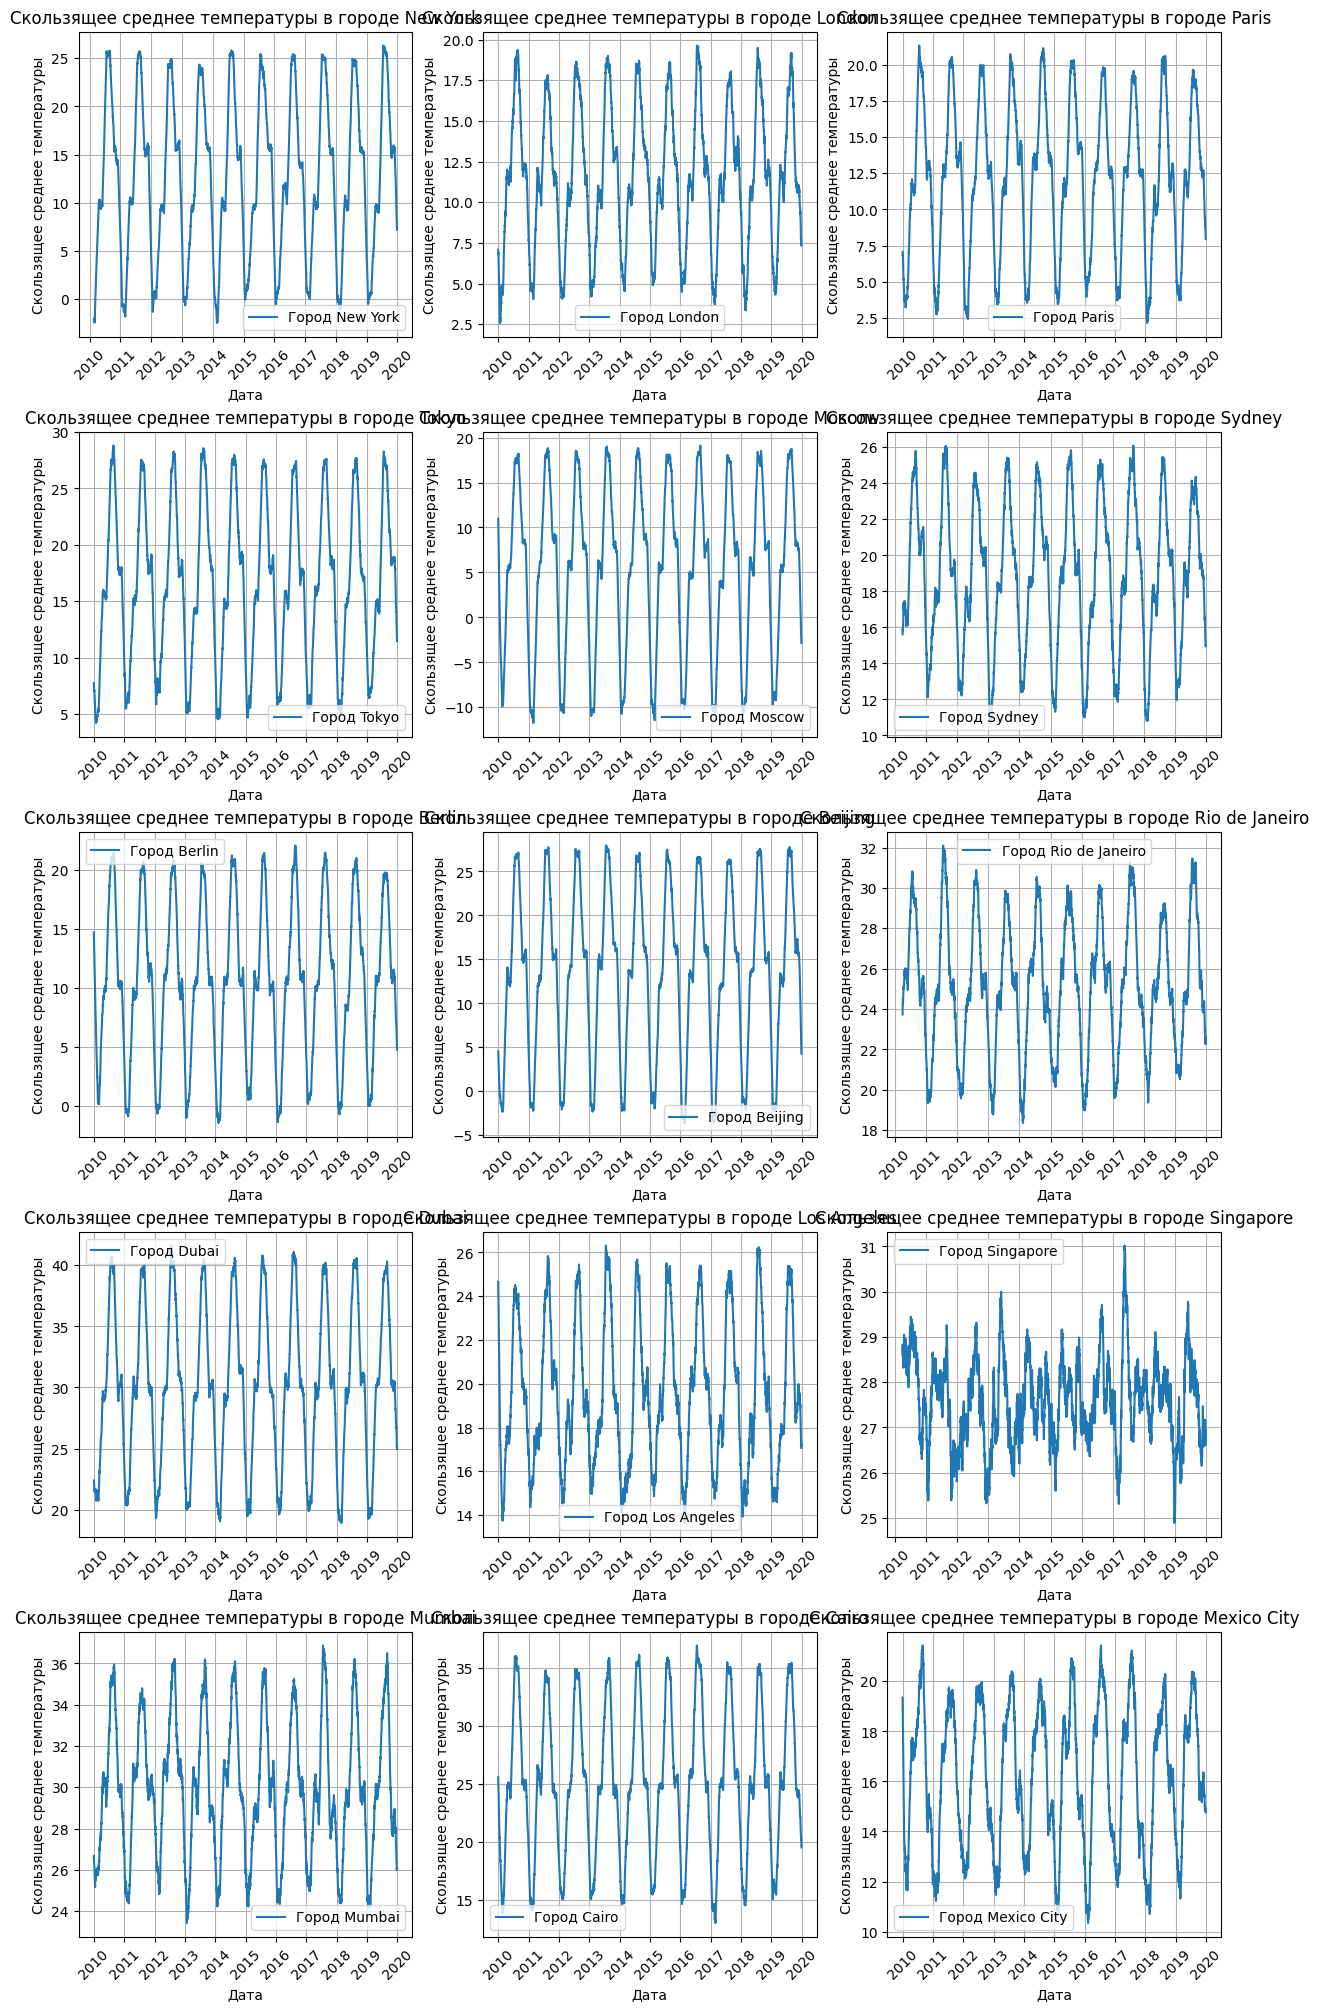

In [72]:
city_un_2 = df['city'].unique()
num = len(city_un_2)
cols = 3
rows = (num + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows), constrained_layout=True)
axes = axes.flatten()
for i, city in enumerate(city_un_2):
    city_data = df[df['city'] == city]
    axes[i].plot(city_data['timestamp'], city_data['MA'], label=f'Город {city}')
    axes[i].set_title(f'Скользящее среднее температуры в городе {city}')
    axes[i].set_xlabel('Дата')
    axes[i].set_ylabel('Скользящее среднее температуры')
    axes[i].legend()
    axes[i].grid()
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

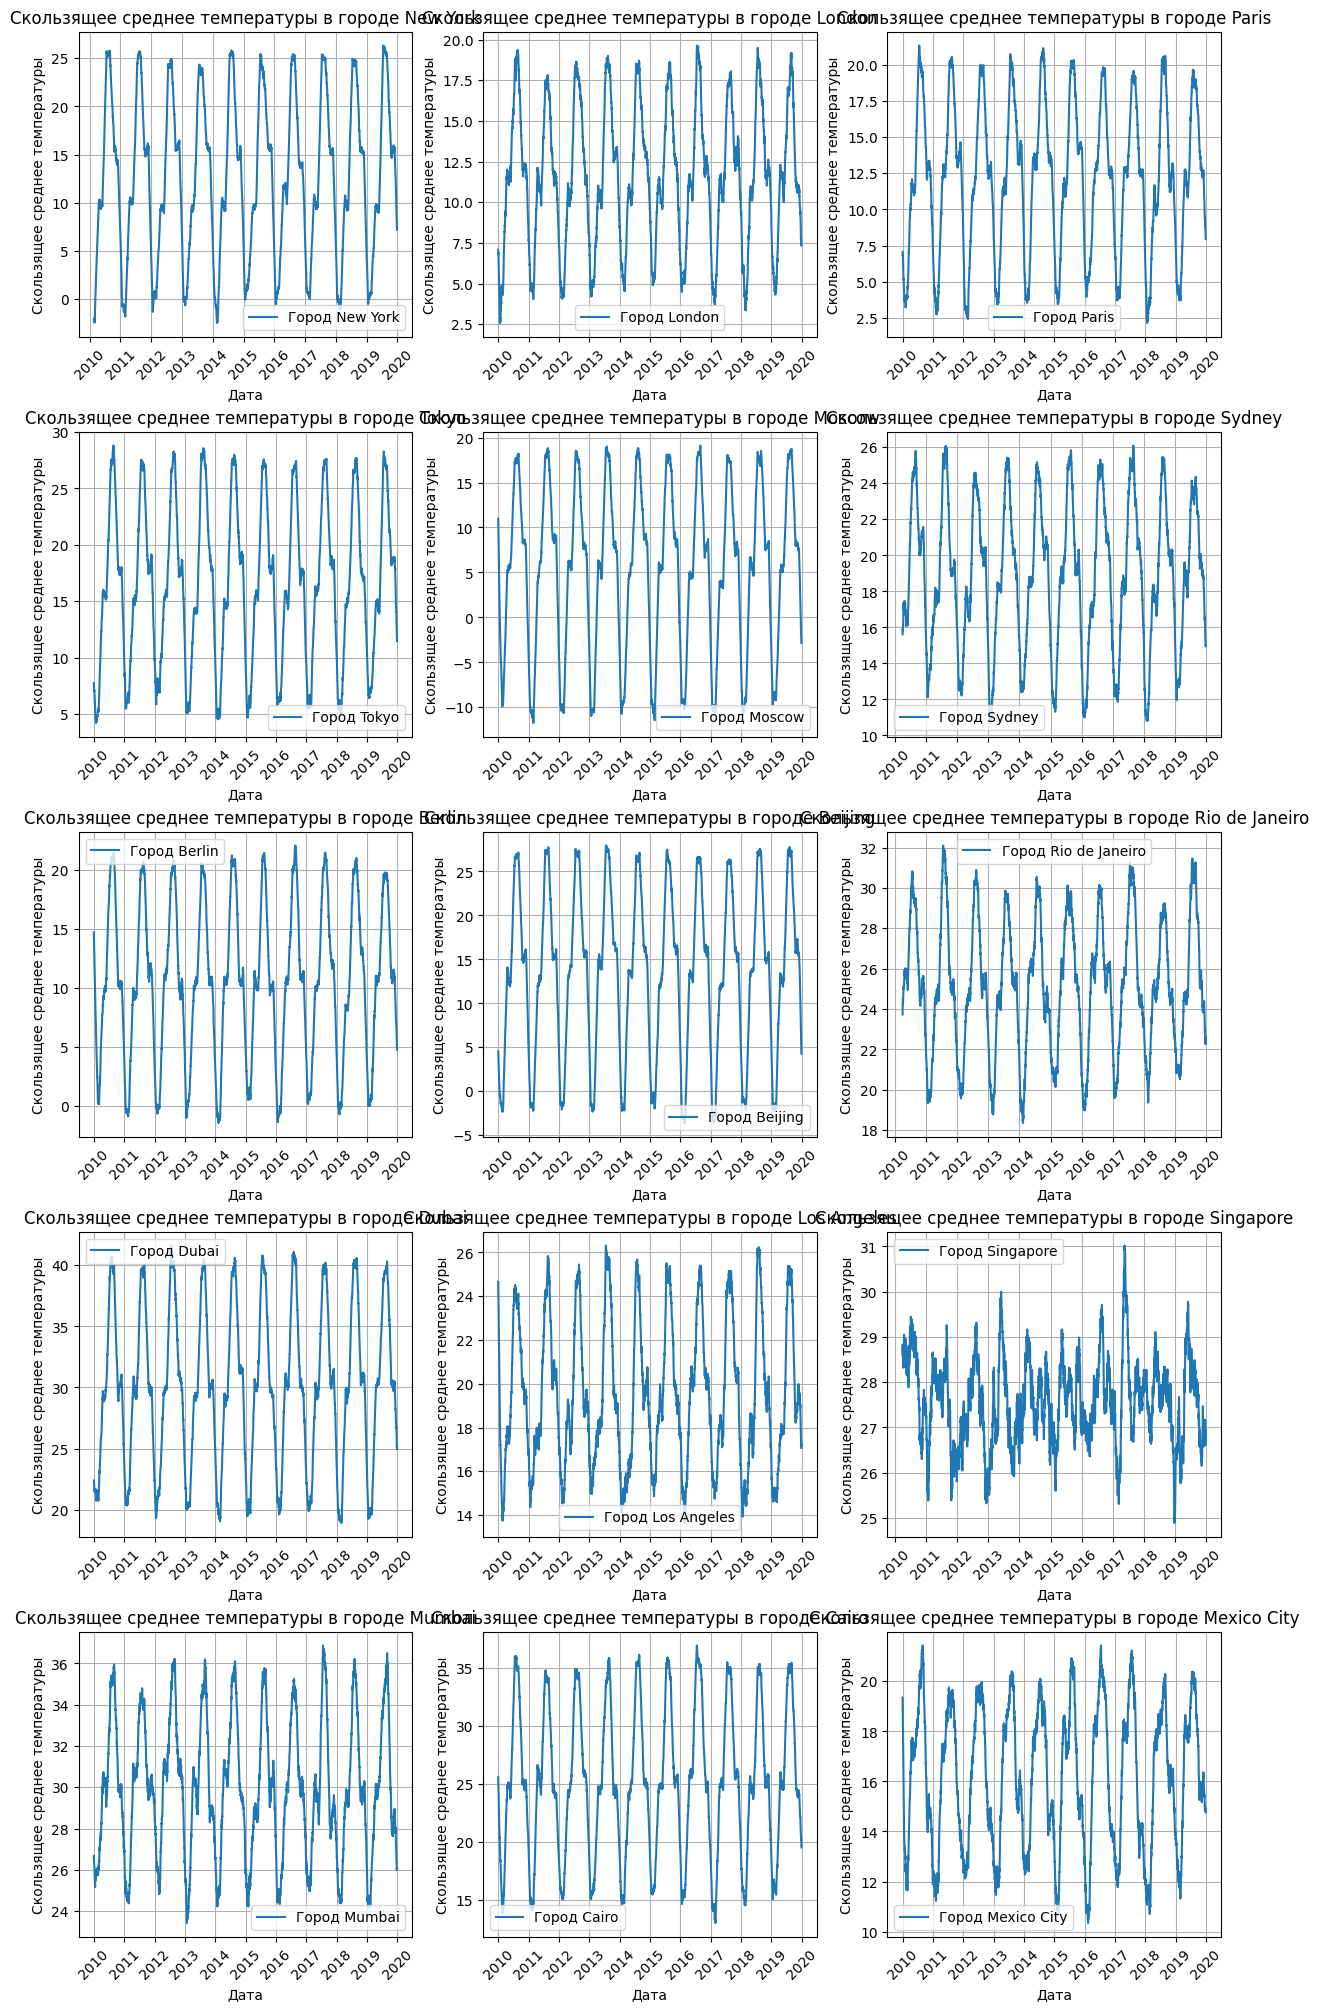

In [73]:
city_un = df['city'].unique()
num = len(city_un)
cols = 3
rows = (num + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows), constrained_layout=True)
axes = axes.flatten()

for i, city in enumerate(city_un):
    city_data = df[df['city'] == city]
    axes[i].plot(city_data['timestamp'], city_data['MA'], label=f'Город {city}')

    axes[i].set_title(f'Скользящее среднее температуры в городе {city}')
    axes[i].set_xlabel('Дата')
    axes[i].set_ylabel('Скользящее среднее температуры')
    axes[i].legend()
    axes[i].grid()
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [74]:
def anomalies_place(df, city):
    filtered_df = df.query(f'city == "{city}"')
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df['timestamp'], filtered_df['temperature'], label='Температура', color='green')
    outliers = filtered_df[filtered_df['anomalies_2sigma']]
    plt.scatter(outliers['timestamp'], outliers['temperature'], color='red', label='Аномалии')
    plt.title(f'Температура в городе {city}')
    plt.xlabel('Дата')
    plt.ylabel('Температура')
    plt.legend()
    plt.grid()
    plt.show()

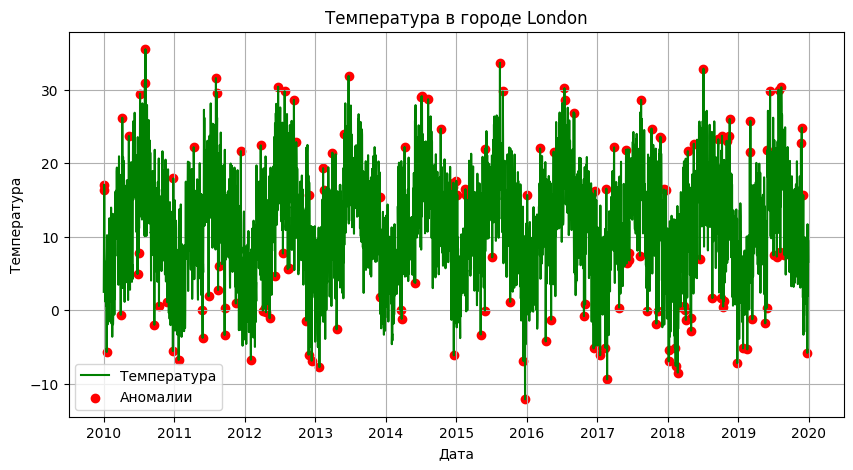

In [75]:
anomalies_place(df, 'London')

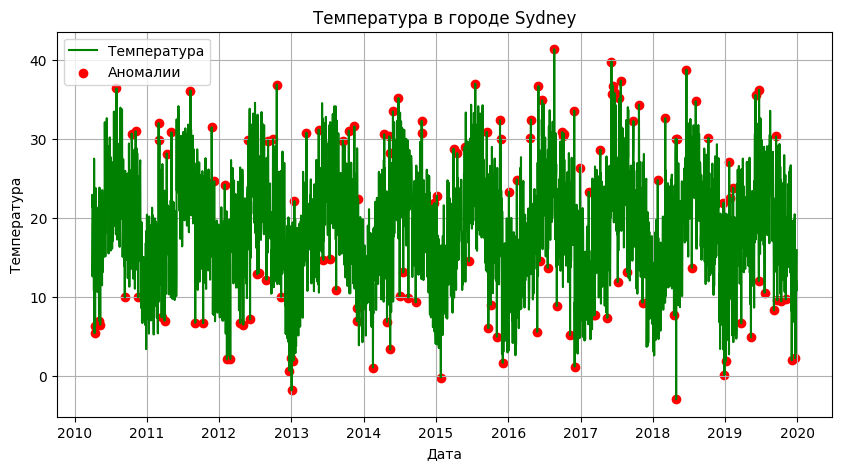

In [76]:
anomalies_place(df, 'Sydney')

## 2. Мониторинг текущей температуры:

In [77]:
import httpx
import json
import asyncio
def get_weather(cities, api_key):
    temperatures = {}
    for city in cities:
        try:
            with httpx.Client() as client:
                response = client.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric')
                stat_weather_data = response.json()
                temp = stat_weather_data['main']['temp']
                temperatures[city] = temp
        except httpx.HTTPStatusError as e:
            print(f"HTTP error occurred: {e.response.status_code} - {e.response.text}")
        except httpx.RequestError as e:
            print(f"Request error occurred: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
    return temperatures

async def async_weather_data(cities, api_key):
    temperatures = {}

    async with httpx.AsyncClient() as client:
        tasks = []

        for city in cities:
            tasks.append(client.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'))

        try:
            responses = await asyncio.gather(*tasks)
            results = Parallel(n_jobs=-1)(delayed(process_response)(response) for response in responses)

            for city_name, temp in results:
                temperatures[city_name] = temp

        except httpx.HTTPStatusError as e:
            print(f"HTTP error occurred: {e.response.status_code} - {e.response.text}")
        except httpx.RequestError as e:
            print(f"Request error occurred: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

    return temperatures



def process_response(response):
    stat_weather_data = response.json()
    temp = stat_weather_data['main']['temp']
    city_name = stat_weather_data['name']
    return city_name, temp

In [78]:
cities = ['New York', 'London', 'Paris', 'Tokyo', 'Moscow', 'Sydney',
          'Berlin', 'Beijing', 'Rio de Janeiro', 'Dubai', 'Los Angeles',
          'Singapore', 'Mumbai', 'Cairo', 'Mexico City']

api_key = input('Enter your API key (Вставьте ваш ключ API) >>')

Enter your API key (Вставьте ваш ключ API) >>177bfa9b33cb6ed45d90a31e8ae1b072


In [79]:
import time
begin_time = time.perf_counter()
city_temp = get_weather(cities, api_key)
for city, temp in city_temp.items():
    print(f"Город {city}:        Температура {temp}°C")
end_time = time.perf_counter()
print(f"Время обработки: {end_time - begin_time:.2f} seconds")

Город New York:        Температура 0.63°C
Город London:        Температура 12.41°C
Город Paris:        Температура 12.21°C
Город Tokyo:        Температура 3.7°C
Город Moscow:        Температура -4.57°C
Город Sydney:        Температура 20.92°C
Город Berlin:        Температура -0.09°C
Город Beijing:        Температура -0.06°C
Город Rio de Janeiro:        Температура 29.18°C
Город Dubai:        Температура 15.14°C
Город Los Angeles:        Температура 21.93°C
Город Singapore:        Температура 26.45°C
Город Mumbai:        Температура 23.99°C
Город Cairo:        Температура 17.42°C
Город Mexico City:        Температура 19.99°C
Время обработки: 3.69 seconds


In [80]:


begin_time = time.perf_counter()
async def main():
    city_temp = await async_weather_data(cities, api_key)
    for city, temp in city_temp.items():
        print(f"Город {city}: Температура {temp}°C")
await main()
end_time = time.perf_counter()
print(f"Время Обработки: {end_time - begin_time:.2f} seconds")

Город New York: Температура 0.63°C
Город London: Температура 12.41°C
Город Paris: Температура 12.21°C
Город Tokyo: Температура 3.7°C
Город Moscow: Температура -4.57°C
Город Sydney: Температура 20.92°C
Город Berlin: Температура -0.09°C
Город Beijing: Температура -0.06°C
Город Rio de Janeiro: Температура 29.18°C
Город Dubai: Температура 15.14°C
Город Los Angeles: Температура 21.93°C
Город Singapore: Температура 26.45°C
Город Mumbai: Температура 23.99°C
Город Cairo: Температура 17.42°C
Город Mexico City: Температура 19.99°C
Время Обработки: 0.54 seconds


Асинхронность и многопоточность привело к ускорению с 3,69 секунд до 0,54 секунды. В несколько раз.

In [69]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


# Streamlit  разработан в отдельном файле app.py